In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [54]:
def find_fwhm(f_x, x):
    ind = 0
    for i in range(0, len(f_x)):
        if f_x[i] > np.max(f_x)/2 and ind ==0:
            a = i
            ind = 1

        if f_x[i] < np.max(f_x)/2 and ind ==1:
            b = i
            break
    return x[b] - x[a]


def gaussian(x, x0, sigma, A):
    return A * np.exp(-0.5 * (x-x0)**2 / sigma**2)

def thermal(x, x0, amp, sigma):
    order = 15
    res = np.exp(-0.5 * (x-x0)**2 / sigma**2)
    return amp/1.6 * polylog(2, res)

def Thomas_Fermi_1d(x, x0, amp, sigma):
    res = (1-(( x - x0 ) / sigma) **2) **(3/2)
    return amp * np.where(res > 0, res, 0)

def density_1d(x, x0_bec, x0_th, amp_bec, amp_th, sigma_bec, sigma_th):
    return thermal(x, x0_th, amp_th, sigma_th) + Thomas_Fermi_1d(x, x0_bec, amp_bec, sigma_bec)


def polylog(pow, x):
    order = 500
    sum = 0
    for k in range(1,order):
        sum  += x ** k /k **pow
    return sum

def ThomasFermi_2d(x, y=0.0, centerx=0.0, centery=0.0, amplitude=1.0, sigmax=1.0, sigmay=1.0):
    res = (1- ((x-centerx)/sigmax)**2 - ((y-centery)/sigmay)**2)**(3 / 2)
    return amplitude * np.where(res > 0, res, 0)
    # return amplitude * 5 / 2 / np.pi / max(tiny, sigmax * sigmay) * np.where(res > 0, res, 0)

def polylog2_2d(x, y=0.0, centerx=0.0, centery=0.0, amplitude=1.0, sigmax=1.0, sigmay=1.0):
    ## Approximation of the polylog function with 2D gaussian as argument. -> discribes the thermal part of the cloud
    return amplitude/1.643  * polylog(2, np.exp( -((x-centerx)**2/(2 * (sigmax)**2))-((y-centery)**2/( 2 * (sigmay)**2)) ))
    # return amplitude / 2 / np.pi / 1.20206 / max(tiny, sigmax * sigmay) * polylog(2, np.exp( -((x-centerx)**2/(2 * (sigmax)**2))-((y-centery)**2/( 2 * (sigmay)**2)) ))


def density_profile_BEC_2d(x, y=0.0, amp_bec=1.0, amp_th=1.0, x0_bec=0.0, y0_bec=0.0, x0_th=0.0, y0_th=0.0,
                           sigmax_bec=1.0, sigmay_bec=1.0, sigmax_th=1.0, sigmay_th=1.0):
    return ThomasFermi_2d(x=x, y=y, centerx=x0_bec, centery=y0_bec,
                          amplitude=amp_bec, sigmax=sigmax_bec, sigmay=sigmay_bec
                          ) + polylog2_2d(x=x, y=y, centerx=x0_th, centery=y0_th,
                                          amplitude=amp_th, sigmax=sigmax_th, sigmay=sigmay_th)



C:\Users\Jianshun Gao\AppData\Local\Temp\ipykernel_13296\3599946220.py:38: RuntimeWarning: invalid value encountered in power
  res = (1- ((x-centerx)/sigmax)**2 - ((y-centery)/sigmay)**2)**(3 / 2)


FWHM TF = 1.2161216121612153
FWHM Thermal = 1.8241824182418238


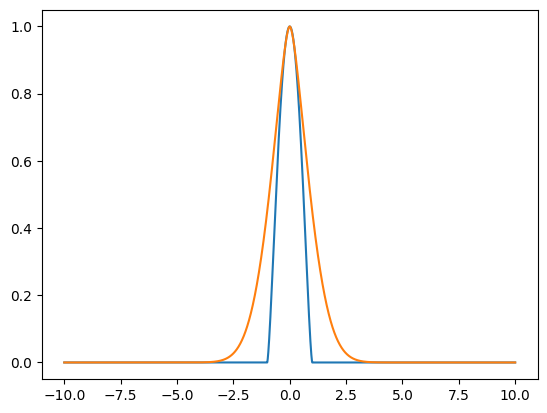

In [55]:
x = np.linspace(-10, 10, 10000)

TF = ThomasFermi_2d(x, y=0, centerx=0, centery=0, amplitude=1, sigmax=1,sigmay=1)
th = polylog2_2d(x, sigmax=1)

print(f'FWHM TF = {find_fwhm(TF, x)}')
print(f'FWHM Thermal = {find_fwhm(th, x)}')

plt.plot(x, TF)
plt.plot(x, th)
plt.show()

C:\Users\Jianshun Gao\AppData\Local\Temp\ipykernel_13296\3599946220.py:23: RuntimeWarning: invalid value encountered in power
  res = (1-(( x - x0 ) / sigma) **2) **(3/2)


FWHM TF = 1.2161216121612153
FWHM Thermal = 1.8241824182418238


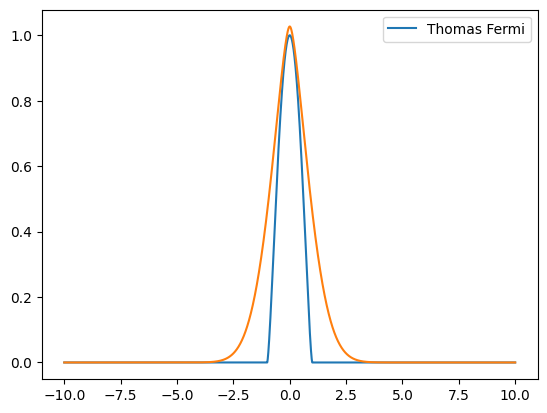

In [57]:
x = np.linspace(-10, 10, 10000)

TF = Thomas_Fermi_1d(x, x0=0, amp=1, sigma=1)
th = thermal(x, x0=0, amp=1, sigma=1)

print(f'FWHM TF = {find_fwhm(TF, x)}')
print(f'FWHM Thermal = {find_fwhm(th, x)}')

plt.plot(x, TF, label='Thomas Fermi')
plt.plot(x, th)
plt.legend()
plt.show()

In [42]:
thermal(0, x0=0, amp=1, sigma=1)

1.6110390064904865

In [34]:
print(1**3/2)

0.5


In [43]:
x0 = 0
sigma = 1

np.exp(-0.5 * (0-x0)**2 / sigma**2)

1.0

In [53]:
print(polylog(2,1))

1.642932065514894


In [59]:
print(np.sqrt(1-4**(-1/3))*2)

1.2166174009154453
